In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


Generating a synthetic datset

In [8]:
X,y=make_classification(
n_features=10,
n_samples=1000,
n_informative=4,
n_redundant=6,
n_repeated=0,
n_classes=2,
random_state=42


)

split the dataset

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

Train a logistic Regression Model

In [11]:
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       122
           1       0.69      0.66      0.68       128

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250



In [13]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[84, 38],
       [43, 85]])

In [14]:
import seaborn as sns

<Axes: >

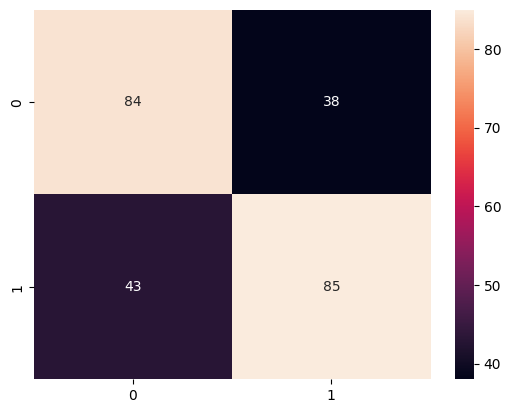

In [15]:
sns.heatmap(cm,annot=True)

Change the threshold to see how precision,recall changes

In [23]:
probabilities=model.predict_proba(X_test)[:,1]
probabilities

array([0.57822587, 0.52735143, 0.52549286, 0.42366894, 0.13841554,
       0.12313382, 0.46883093, 0.75948267, 0.0625359 , 0.35868659,
       0.11232103, 0.83728295, 0.89532679, 0.82659466, 0.45989201,
       0.1847224 , 0.67120632, 0.23166802, 0.44797747, 0.19607102,
       0.47034334, 0.94976287, 0.12254625, 0.60645741, 0.68401263,
       0.69154072, 0.74573154, 0.35445467, 0.71366823, 0.23600192,
       0.41372387, 0.31442238, 0.51846885, 0.67030839, 0.47785359,
       0.3046691 , 0.11323506, 0.21753596, 0.47609673, 0.82196242,
       0.12548248, 0.35859981, 0.46897845, 0.21401439, 0.23914749,
       0.55243292, 0.68077102, 0.2057241 , 0.39247397, 0.78390729,
       0.53617752, 0.84961668, 0.48942874, 0.64911008, 0.26780503,
       0.47479916, 0.72275676, 0.96093933, 0.84719638, 0.50530374,
       0.10504748, 0.92584106, 0.22096754, 0.46482437, 0.18064713,
       0.32954476, 0.82746705, 0.71344147, 0.03891063, 0.60762971,
       0.26349585, 0.33998991, 0.15936681, 0.28760272, 0.34200

In [25]:
probabilities>0.4

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True, False,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
       False, False,

In [29]:
y_pred=(probabilities>0.4).astype(int) #with new probability threshold

In [32]:
#get the classification report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       122
           1       0.67      0.82      0.74       128

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.69       250
weighted avg       0.71      0.70      0.70       250



<Axes: >

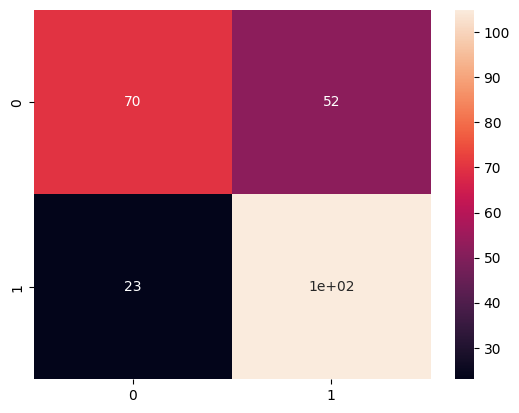

In [34]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [39]:
#now i want to be my recal number 90
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,probabilities)
fpr[:5],tpr[:5],threshold[:5]


(array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]),
 array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625]),
 array([       inf, 0.97928246, 0.80890214, 0.80840719, 0.80207033]))

In [44]:
desired_recall=0.9
closest_index=np.argmin(abs(tpr-desired_recall))

In [46]:
threshold[closest_index]

np.float64(0.26349585272229664)

In [48]:
fpr[closest_index]

np.float64(0.7049180327868853)

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       122
           1       0.67      0.82      0.74       128

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.69       250
weighted avg       0.71      0.70      0.70       250



now we got the threshold value as 0.2634

In [53]:
y_pred=(probabilities>0.26349585272229664).astype(int)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.30      0.42       122
           1       0.57      0.90      0.70       128

    accuracy                           0.60       250
   macro avg       0.65      0.60      0.56       250
weighted avg       0.65      0.60      0.56       250



In [55]:
from sklearn.metrics import auc
area=auc(fpr,tpr)
area

np.float64(0.764856557377049)

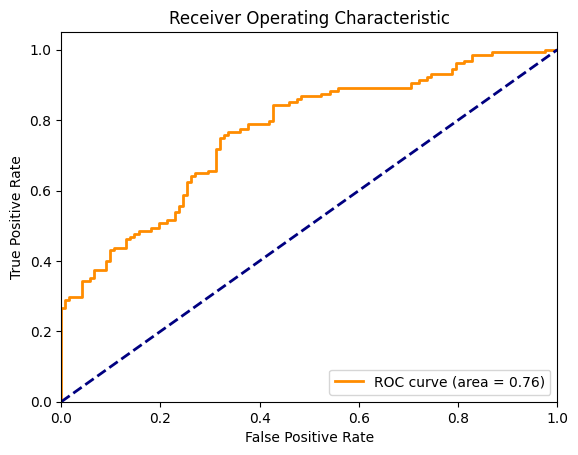

In [57]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Now train XGBoost model

In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       122
           1       0.93      0.89      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [59]:
probabilities_xgb = model.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, probabilities_xgb)

fpr_xgb[:5], tpr_xgb[:5], thresholds_xgb[:5]

(array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]),
 array([0.       , 0.0078125, 0.09375  , 0.09375  , 0.203125 ]),
 array([       inf, 0.99996376, 0.99989676, 0.999892  , 0.9997204 ],
       dtype=float32))

In [61]:
area2 = auc(fpr_xgb, tpr_xgb)
area2

np.float64(0.946016905737705)

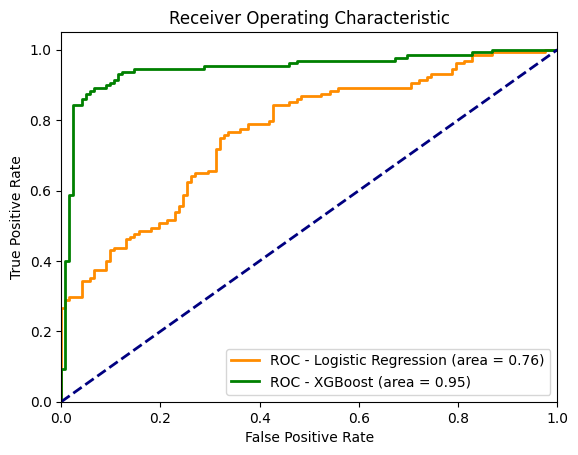

In [63]:
plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC - Logistic Regression (area = %0.2f)' % area)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='ROC - XGBoost (area = %0.2f)' % area2)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [67]:
desired_recall = 0.95

closest_index = np.argmin(abs(tpr_xgb-desired_recall))
tpr_xgb[closest_index], thresholds_xgb[closest_index], fpr_xgb[closest_index]

(np.float64(0.953125), np.float32(0.01948603), np.float64(0.28688524590163933))